(985, 6)


,Adj Close
Date,
1962-06-15,0.948818
1962-06-18,0.938150
1962-06-19,0.955931
1962-06-20,0.933171
1962-06-21,0.898319


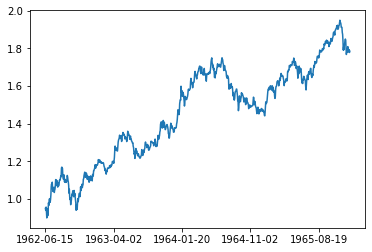

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import Holt as Holtstatsmodel

data=pd.read_csv("IBM.csv", index_col=0, header=0)
print(data.shape)
data.head()
close=data.iloc[:,4:5]
linear=close.iloc[93:]

linear.shape
plt.figure()
plt.xticks(np.arange(0,985,200))
plt.plot(linear)

linear.head()

In [ ]:
def Holt(alpha, beta, lt_1, bt_1, h=1):
    lt=alpha*lt_1+(1-alpha)*(lt_1+bt_1)
    bt=beta*(lt-lt_1)+(1-beta)*bt_1
    return (lt+h*bt, lt, bt)

def countMSE(alpha,beta):
    reals=linear["Adj Close"]
    lts=[linear["Adj Close"][0]]
    bts=[linear["Adj Close"][1]-linear["Adj Close"][0]]
    ests=[linear["Adj Close"][0]]
    for i in range (1,reals.size):
        est,lt,bt=Holt(alpha,beta,lts[i-1],bts[i-1])
        ests.append(est)
        lts.append(lt)
        bts.append(bt)
    MSE=mean_squared_error(reals,ests)
    return MSE    
fit=Holtstatsmodel(linear["Adj Close"], initialization_method="estimated").fit()
optimal_alpha, optimal_beta=fit.model.params["smoothing_level"], fit.model.params["smoothing_trend"]         

In [68]:
lowestMSE=100*linear.size  #something big enough to be overwitten in first iteration
for beta in np.arange(0.00,1.0,0.01):
    for alpha in np.arange(0.00,1.0,0.01):
        if countMSE(alpha,beta)<lowestMSE:    
            lowestMSE=countMSE(alpha,beta)
            best_alpha=alpha
            best_beta=beta

print("Minimal MSE error for alpha: ",best_alpha,",beta: ",beta,", optimal alpha, beta values from statsmodel: ",optimal_alpha,", ",optimal_beta)

Minimal MSE error for alpha:  0.99 ,beta:  0.99 , optimal alpha, beta values from statsmodel:  0.996771449825978 ,  0.0


Turns out that alpha value from grid search is similar to statsmodel. Beta value that I've got from grid search is different. I must have made some mistake in my implementation...
